In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
classifications_loc = '/data/galaxy_zoo/weekly_dumps/2017-10-15_galaxy_zoo_sloan_classifications.csv'
df = pd.read_csv(classifications_loc)
df.head()

,id,subject_id,user,created_at,lang,user_agent,sloan-0,sloan-1,sloan-2,sloan-3,sloan-4,sloan-5,sloan-6,sloan-7,sloan-8,sloan-9,sloan-10,sloan-11
0,504e52a80454e21d0b00000b,504e468dc499611ea600cb73,Freethesouls,2012-09-10 20:50:48 UTC,en,unknown,a-0,NaN,NaN,NaN,NaN,a-0,x-0,a-0,NaN,NaN,NaN,NaN
1,504e52c10454e21d0b00000f,504e468dc499611ea600cb74,Freethesouls,2012-09-10 20:51:13 UTC,en,unknown,a-0,NaN,NaN,NaN,NaN,a-1,NaN,a-2,NaN,NaN,NaN,NaN
2,504e52c70454e21d0b000010,504e468ec499611ea600cb79,Freethesouls,2012-09-10 20:51:19 UTC,en,unknown,a-0,NaN,NaN,NaN,NaN,a-0,x-0,a-0,NaN,NaN,NaN,NaN
3,504e52dc0454e21d12000009,504e468ec499611ea600cb82,Freethesouls,2012-09-10 20:51:40 UTC,en,unknown,a-0,NaN,NaN,NaN,NaN,a-1,NaN,a-1,NaN,NaN,NaN,NaN
4,504e5305ba40af6cc200000b,504e468fc499611ea600cb8d,Freethesouls,2012-09-10 20:52:21 UTC,en,unknown,a-0,NaN,NaN,NaN,NaN,a-1,NaN,a-1,NaN,NaN,NaN,NaN


In [13]:
bar_answers = df['sloan-4']
print(bar_answers.value_counts())
bar_df = df[['subject_id', 'sloan-4']]
mapping = {
    'a-0': 'no_bulge',
    'a-1': 'noticeable',
    'a-2': 'obvious',
    'a-3': 'dominant',
    'NaN': np.nan,
    'nan': np.nan
}
bar_df['bar_response'] = bar_df['sloan-4'].apply(lambda x: mapping[str(x)])
bar_df = bar_df.dropna(subset=['bar_response'])
del bar_df['sloan-4']

a-2    1132394
a-1     889576
a-3     401078
a-0     218635
Name: sloan-4, dtype: int64


/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [14]:
bar_df.sample(10)

,subject_id,bar_response
8860322,504e4d58c499611ea60134cb,noticeable
4541345,504f1e38c499611ea6040a3c,obvious
1560801,504eb3c1c499611ea6030e23,obvious
11030751,504ecbc5c499611ea6035089,no_bulge
7335656,504ebf94c499611ea6032fef,noticeable
6624490,504e4bcbc499611ea60121ec,obvious
3041092,504e9232c499611ea602a582,obvious
12618419,504f06e9c499611ea603d906,obvious
2963596,504eef66c499611ea603a59f,noticeable
10984328,504e57c9c499611ea6019315,no_bulge


In [15]:
def count_responses(series):
    counts = {
        'no_bulge': 0,
        'noticeable': 0,
        'obvious': 0,
        'dominant': 0
    }
    for value in list(series):
        print(value)
        counts[value] = counts[value] + 1
        print(counts[value])
        raise Exception
    return counts

def count_if_no_bulge(series):
    return len(series[series == 'no_bulge'])
def count_if_noticeable(series):
    return len(series[series == 'noticeable'])
def count_if_obvious(series):
    return len(series[series == 'obvious'])
def count_if_dominant(series):
    return len(series[series == 'dominant'])

response_df = bar_df.groupby('subject_id').agg([count_if_no_bulge, count_if_noticeable, count_if_obvious, count_if_dominant]).reset_index()
display(response_df.head())

subject_id      bar_response                      \
                            count_if_no_bulge count_if_noticeable   
0  504e468dc499611ea600cb6a                 0                   2   
1  504e468dc499611ea600cb6b                 2                  18   
2  504e468dc499611ea600cb6c                 1                   3   
3  504e468dc499611ea600cb6d                 1                   0   
4  504e468dc499611ea600cb6e                 0                   0   

                                      
  count_if_obvious count_if_dominant  
0                3                 2  
1                5                 0  
2                4                 1  
3                1                 0  
4                3                 1

In [16]:
response_df = response_df['bar_response']

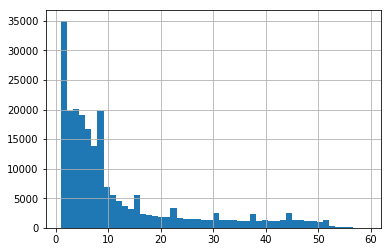

In [17]:
response_df['total_responses'] = response_df['count_if_no_bulge'] + response_df['count_if_noticeable'] + response_df['count_if_obvious'] + response_df['count_if_dominant']
response_df['total_responses'].hist(bins=50)

In [18]:
response_df['no_bulge_frac'] = response_df['count_if_no_bulge'] / response_df['total_responses']
response_df['noticeable_frac'] = response_df['count_if_noticeable'] / response_df['total_responses']
response_df['obvious_frac'] = response_df['count_if_obvious'] / response_df['total_responses']
response_df['dominant_frac'] = response_df['count_if_dominant'] / response_df['total_responses']

In [19]:
responses = response_df[response_df['total_responses'] > 10]

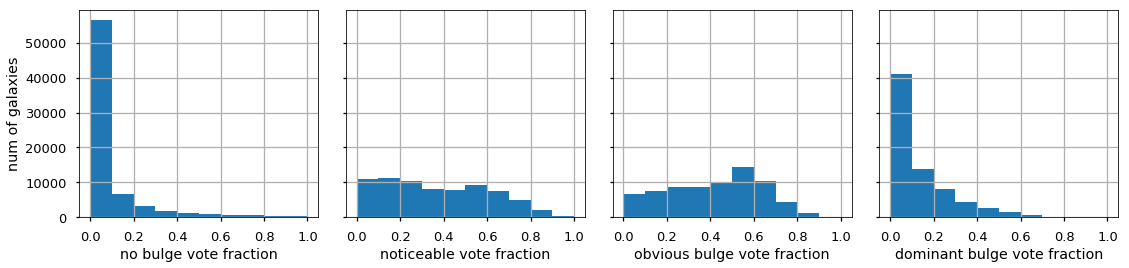

In [39]:
fig, axes = plt.subplots(ncols=4, figsize=(16, 4), sharex=True, sharey=True)
responses['no_bulge_frac'].hist(ax=axes[0])
axes[0].set_xlabel('no bulge vote fraction')
responses['noticeable_frac'].hist(ax=axes[1])
axes[1].set_xlabel('noticeable vote fraction')
responses['obvious_frac'].hist(ax=axes[2])
axes[2].set_xlabel('obvious bulge vote fraction')
responses['dominant_frac'].hist(ax=axes[3])
axes[3].set_xlabel('dominant bulge vote fraction')
axes[0].set_ylabel('num of galaxies')
fig.tight_layout()

In [36]:
def compare_remaining_votes(df, col_baseline, col_a, col_b, col_c, ax):
    
    color={
        'count_if_no_bulge': 'b',
        'count_if_noticeable': 'k',
        'count_if_obvious': 'r', 
        'count_if_dominant': 'g'
    }
    vote_frac_bins = np.linspace(start=0, stop=30, num=30)
    mean_col_a = []
    mean_col_b = []
    mean_col_c = []
    df['bin_index'] = np.digitize(df[col_baseline], bins=vote_frac_bins)
    for bin_index in range(len(vote_frac_bins)):
        selected = df[df['bin_index'] == bin_index]
        mean_col_a.append(selected[col_a].mean())
        mean_col_b.append(selected[col_b].mean())
        mean_col_c.append(selected[col_c].mean())
    ax.plot(vote_frac_bins, mean_col_a, color[col_a])
    ax.plot(vote_frac_bins, mean_col_b, color[col_b])
    ax.plot(vote_frac_bins, mean_col_c, color[col_c])
    ax.set_xlabel('{} votes'.format(col_baseline.replace('count_if_', '')))
    ax.set_ylabel('other votes')
    ax.legend([col_a.replace('count_if_', ''), col_b.replace('count_if_', ''), col_c.replace('count_if_', '')])

/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/data/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


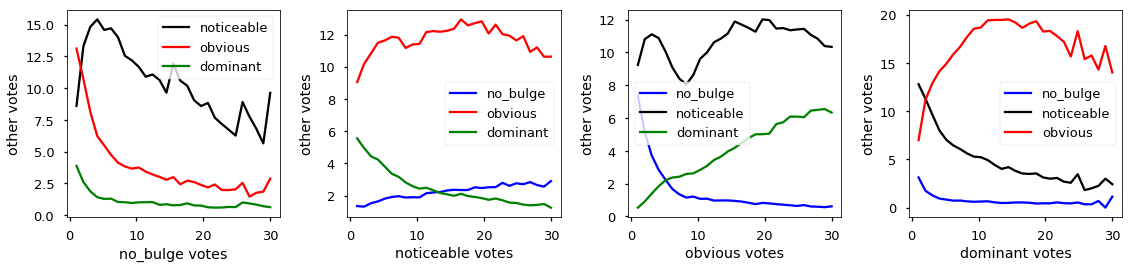

In [37]:
import seaborn as sns
sns.set_context('talk')
fig, axes = plt.subplots(ncols=4, figsize=(16, 4))
compare_remaining_votes(responses, 'count_if_no_bulge', 'count_if_noticeable', 'count_if_obvious', 'count_if_dominant', axes[0])
compare_remaining_votes(responses, 'count_if_noticeable', 'count_if_no_bulge', 'count_if_obvious', 'count_if_dominant', axes[1])
compare_remaining_votes(responses, 'count_if_obvious', 'count_if_no_bulge', 'count_if_noticeable', 'count_if_dominant', axes[2])
compare_remaining_votes(responses, 'count_if_dominant', 'count_if_no_bulge', 'count_if_noticeable', 'count_if_obvious', axes[3])
fig.tight_layout()

In [43]:
def compare_remaining_fractions(df, col_baseline, col_a, col_b, col_c, ax):
    
    # define line colors for plot
    color={
        'count_if_no_bulge': 'b',
        'count_if_noticeable': 'k',
        'count_if_obvious': 'r', 
        'count_if_dominant': 'g'
    }
    
    # 20 vote fraction bins from 0 to 1
    vote_frac_bins = np.linspace(start=0., stop=.8, num=20)
    baseline_vote_fraction = df[col_baseline] / (df[col_baseline] + df[col_a] + df[col_b])

    # for every row, work out which vote fraction bin it should be in
    bin_indices = np.digitize(baseline_vote_fraction, bins=vote_frac_bins)
    bin_indices = bin_indices - 1 # should be bin 0 through bin 19, not bin 1 through 20

    mean_col_a_votes = np.zeros_like(vote_frac_bins)
    mean_col_b_votes = np.zeros_like(vote_frac_bins)
    mean_col_c_votes = np.zeros_like(vote_frac_bins)
    # for all the rows in each vote fraction bin, what's the mean number of votes?
    for bin_index in range(20):
        selected = df[bin_indices == bin_index]  # values with that baseline vote fraction
        mean_col_a_votes[bin_index] = selected[col_a].mean()
        mean_col_b_votes[bin_index] = selected[col_b].mean() 
        mean_col_c_votes[bin_index] = selected[col_c].mean() 

    total_other_votes = mean_col_a_votes + mean_col_b_votes + mean_col_c_votes
    ax.plot(vote_frac_bins, mean_col_a_votes/total_other_votes, color[col_a])
    ax.plot(vote_frac_bins, mean_col_b_votes/total_other_votes, color[col_b])
    ax.plot(vote_frac_bins, mean_col_c_votes/total_other_votes, color[col_c])
    ax.set_xlabel('{} vote fraction'.format(col_baseline.replace('count_if_', '')))
    ax.set_ylabel('fraction of other votes')
    ax.legend([col_a.replace('count_if_', ''), col_b.replace('count_if_', ''), col_c.replace('count_if_', '')])

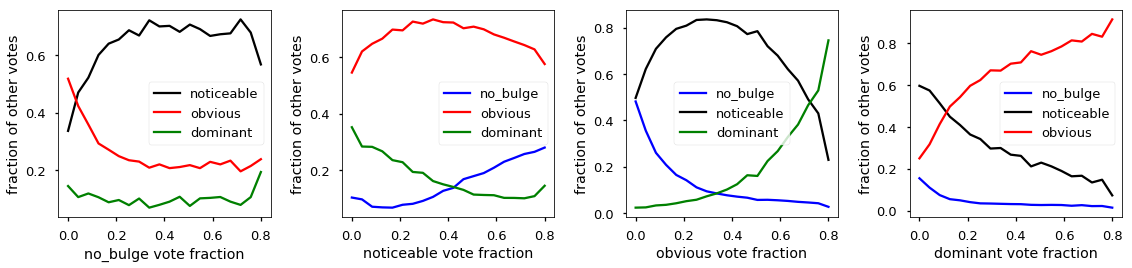

In [44]:
import seaborn as sns
sns.set_context('talk')
fig, axes = plt.subplots(ncols=4, figsize=(16, 4))
compare_remaining_fractions(responses, 'count_if_no_bulge', 'count_if_noticeable', 'count_if_obvious', 'count_if_dominant', axes[0])
compare_remaining_fractions(responses, 'count_if_noticeable', 'count_if_no_bulge', 'count_if_obvious', 'count_if_dominant', axes[1])
compare_remaining_fractions(responses, 'count_if_obvious', 'count_if_no_bulge', 'count_if_noticeable', 'count_if_dominant', axes[2])
compare_remaining_fractions(responses, 'count_if_dominant', 'count_if_no_bulge', 'count_if_noticeable', 'count_if_obvious', axes[3])
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True)
_ = axes[0].hist2d(responses['no_bulge_frac'], responses['obvious_frac'])
_ = axes[1].hist2d(responses['no_bulge_frac'], responses['dominant_frac'])
_ = axes[2].hist2d(responses['obvious_frac'], responses['dominant_frac'])